In [32]:
# Install gdown to download Google Drive files
!pip install gdown

import gdown
import os

# Create folder
os.makedirs("csv_files", exist_ok=True)

# Dataset 1: Fear & Greed
gdown.download(
    "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf",
    "csv_files/fear_greed.csv",
    quiet=False
)

# Dataset 2: Hyperliquid Trader Data
gdown.download(
    "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs",
    "csv_files/hyperliquid.csv",
    quiet=False
)


Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 49.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/hyperliquid.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 96.3MB/s]


'csv_files/hyperliquid.csv'

In [33]:
# Load The DataSet

import pandas as pd

sent = pd.read_csv("csv_files/fear_greed.csv")
trades = pd.read_csv("csv_files/hyperliquid.csv")

sent.head(), trades.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [34]:
# Convert sentiment date column
sent['date'] = pd.to_datetime(sent['date'])
sent['date'] = sent['date'].dt.date

# Convert trade time column using 'Timestamp IST'
trades['date_time'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['date_time'].dt.date

In [35]:
# Merge Sentiment into Trades

merged = trades.merge(sent[['date','classification']], on='date', how='left')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed


In [36]:
# Simple Features

merged['profit'] = merged['Closed PnL']
merged['trade_size'] = merged['Size USD']
# The 'leverage' column does not exist in the source data. If it needs to be calculated,
# more information is required. For now, this line is removed to prevent errors.
# merged['leverage'] = merged['leverage']

In [37]:
merged.groupby("classification")['profit'].mean()

,profit
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


In [38]:
# The 'leverage' column does not exist, so this line will be removed to prevent errors.

In [39]:
merged.groupby("classification")['trade_size'].sum()

,trade_size
classification,
Extreme Fear,9580240.04
Extreme Greed,18223760.27
Fear,79674391.06
Greed,57045815.74
Neutral,11939551.21


In [40]:
import os
os.makedirs("outputs", exist_ok=True)


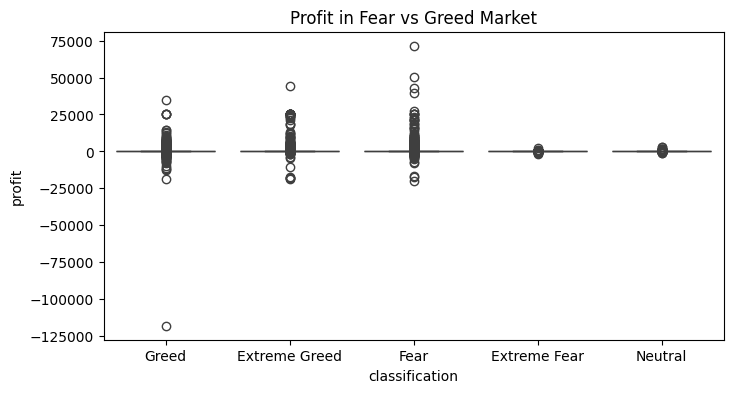

In [41]:
# Profit Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x="classification", y="profit", data=merged)
plt.title("Profit in Fear vs Greed Market")
plt.savefig("outputs/profit_by_sentiment.png")

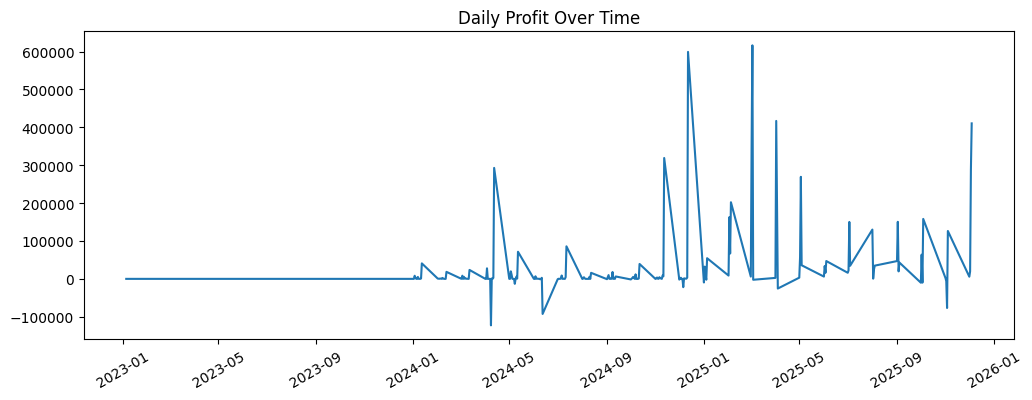

In [42]:
# Daily Profit
daily = merged.groupby('date')['profit'].sum().reset_index()

plt.figure(figsize=(12,4))
plt.plot(daily['date'], daily['profit'])
plt.title("Daily Profit Over Time")
plt.xticks(rotation=30)
plt.savefig("outputs/daily_profit.png")


In [43]:
merged.to_csv("csv_files/merged_processed.csv", index=False)
